In [1]:
pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 6.2 MB/s eta 0:00:00


**1. Постройте приближение функций из набора 1 и 2 в виде
интерполяционного полинома Лагранжа по сетке с равным шагом и по сетке
с узлами – корнями полинома Чебышева. Для обоих случаев постройте
график максимального значения модуля ошибки приближения от числа узлов
интерполяции n = 4,6,8,10**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import math
from scipy.integrate import quad

In [3]:
def f_1(x):
  return np.sin(x + x * np.cos(x ** 2))

def f_2(x):
  return np.maximum(np.cos(x), np.sin(x)) * np.maximum(0.5, np.sin(x**3))

In [4]:
def Q(x,y,t):
    n = len(x)
    Q = np.zeros_like(t, dtype=float)
    omega = np.ones_like(t, dtype=float)
    for i in range(n):
        L = np.ones_like(t, dtype=float)
        for j in range(n):
            if j != i:
                L *= (t - x[j])/(x[i] - x[j])
        Q += L*y[i]
        omega *= (t- x[i])
    return Q, omega

a, b = -2, 2
L = b - a

h = 0.001 * L
t = np.arange(a, b + 0.5*h, h)

def run_func(f, title):
  n_list = [4, 6, 8, 10]
  errU = []
  errT = []

  ft = f(t)

  for n in n_list:
    xx = np.linspace(a, b, n)
    yy = f(xx)
    Q_U, _ = Q(xx, yy, t)
    errU.append(np.max(np.abs(Q_U - ft)))

    xx_T = np.array([(a+b)/2 + (b-a)/2*np.cos((np.pi + 2*np.pi*i)/(2*n)) for i in range(n)])
    yy_T = f(xx_T)
    Q_T, _ = Q(xx_T, yy_T, t)
    errT.append(np.max(np.abs(Q_T - ft)))

    print(f"{title}: n={n} | max_err_uniform={errU[-1]:.6g} | max_err_cheb={errT[-1]:.6g}")

  plt.figure()
  plt.plot(n_list, errU, marker='o', label='Равномерная сетка')
  plt.plot(n_list, errT, marker='o', label='Чебышев (корни)')
  plt.yscale('log')
  plt.xlabel('n')
  plt.ylabel('max |f(x) - P_n(x)|')
  plt.title(f"{title} (шаг проверки = {h:g})")
  plt.grid(True, which='both')
  plt.legend()


набор 1: n=4 | max_err_uniform=1.08159 | max_err_cheb=1.08314
набор 1: n=6 | max_err_uniform=0.480282 | max_err_cheb=0.366823
набор 1: n=8 | max_err_uniform=0.664977 | max_err_cheb=0.209316
набор 1: n=10 | max_err_uniform=0.292853 | max_err_cheb=0.124928
набор 2: n=4 | max_err_uniform=0.455397 | max_err_cheb=0.559169
набор 2: n=6 | max_err_uniform=0.676376 | max_err_cheb=0.481095
набор 2: n=8 | max_err_uniform=0.466273 | max_err_cheb=0.385404
набор 2: n=10 | max_err_uniform=1.12273 | max_err_cheb=0.377464


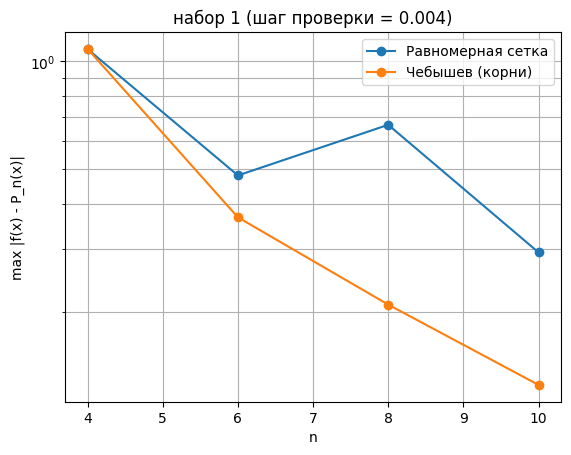

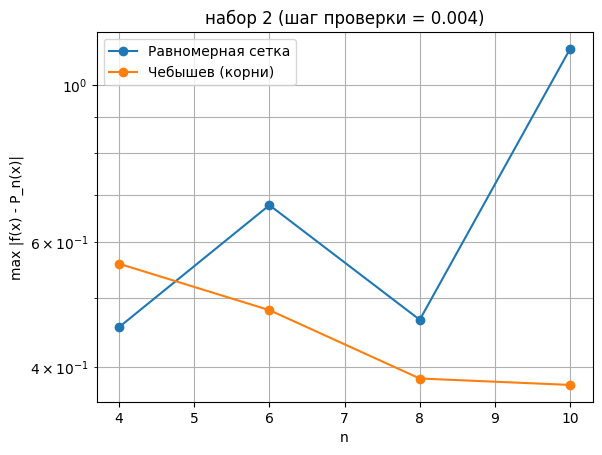

In [5]:
run_func(f_1, "набор 1")
run_func(f_2, "набор 2")

plt.show()

сделал это чисто для себя, чтобы посмотреть)

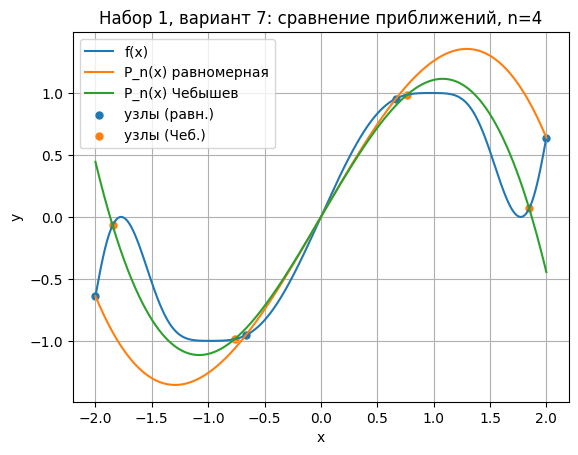

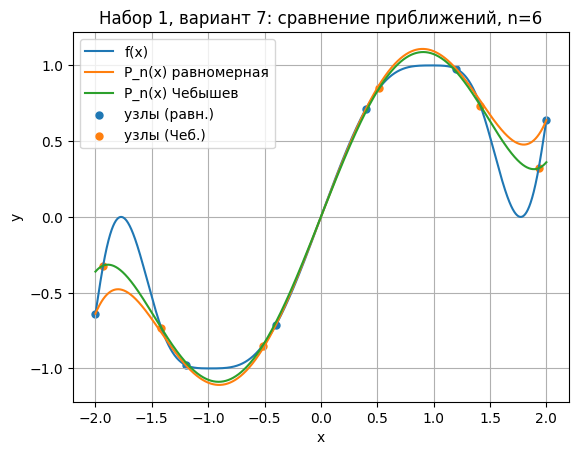

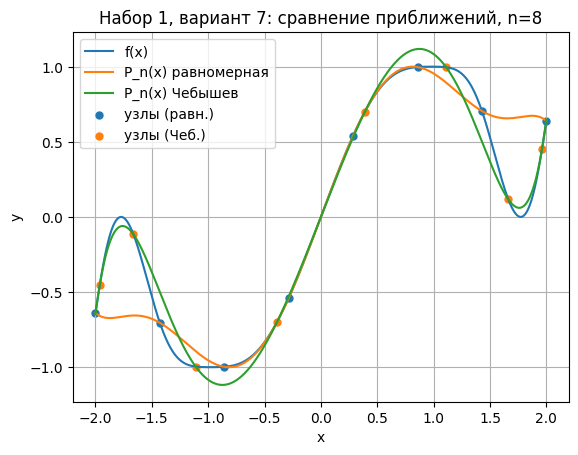

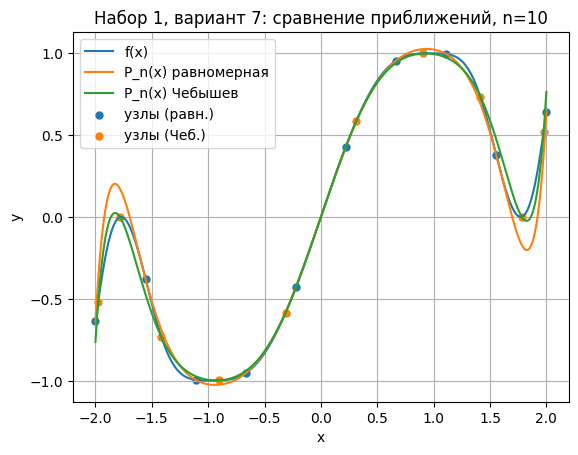

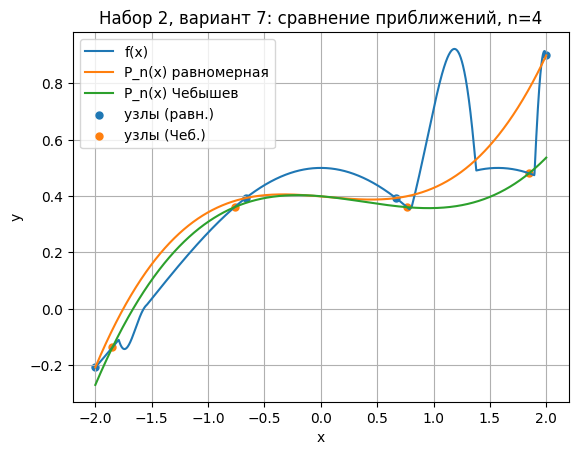

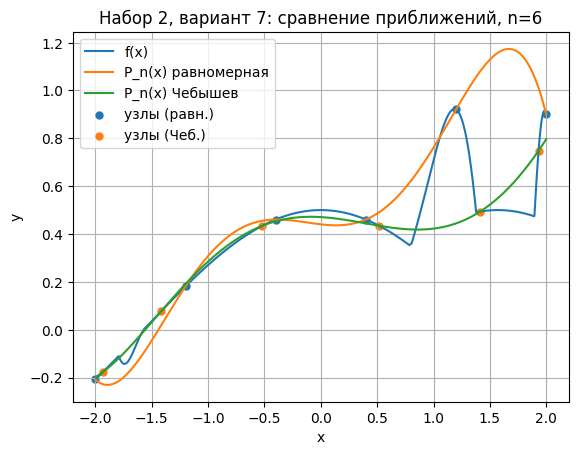

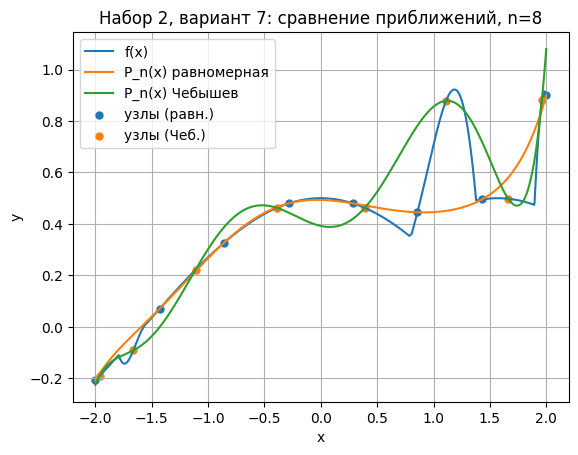

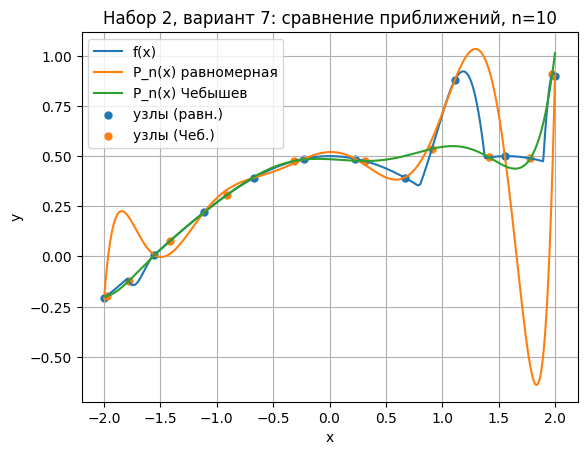

In [6]:
def visualize_approximations(f, title):
    n_list = [4, 6, 8, 10]

    t_vis = np.linspace(a, b, 2000)
    ft_vis = f(t_vis)

    for n in n_list:
        xU = np.linspace(a, b, n)
        yU = f(xU)
        PU, _ = Q(xU, yU, t_vis)

        xC = np.array([(a+b)/2 + (b-a)/2*np.cos((np.pi + 2*np.pi*i)/(2*n)) for i in range(n)])
        yC = f(xC)
        PC, _ = Q(xC, yC, t_vis)

        plt.figure()
        plt.plot(t_vis, ft_vis, label='f(x)')
        plt.plot(t_vis, PU, label='P_n(x) равномерная')
        plt.plot(t_vis, PC, label='P_n(x) Чебышев')

        plt.scatter(xU, yU, s=25, label='узлы (равн.)')
        plt.scatter(xC, yC, s=25, label='узлы (Чеб.)')

        plt.title(f"{title}: сравнение приближений, n={n}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()

    plt.show()

visualize_approximations(f_1, "Набор 1, вариант 7")
visualize_approximations(f_2, "Набор 2, вариант 7")


**2. Оцените асимптотику числа арифметических операций, требующихся для
построения приближения, в зависимости от старшей степени
интерполяционного полином**

Для одной точки:

за ~$n$ операций вычисляется $L_i(t) = ∏_{j \ne i}\frac{t-x_j}{x_i-x_j}$ и дальше за $n$ операций суммируем $L_i \cdot y[i]$, те $O(n^2)$

(если счиатать что мы вставляем всю сетку из $k$ точек допустим, то будет $O(k ⋅ n^2)$)

**3. Постройте график снижения максимального значения модуля ошибки
приближения от числа узлов интерполяции n = 4,6,8,10 при использовании
сетки с равным шагом и сетки по корням Полинома Чебышева
(максимальное значение модуля можно найти перебором среди значений,
вычисленных с шагом 0,001 длины отрезка приближения)**

а тут же тоже самое что и в первом задании?..

**4. Для функции из набора 1 рассчитайте приближение первой производной
функции с использованием центральной разностной схемы, вычисленное с
шагом {0,01;0,001;0,0001} длины отрезка приближения. На основе
полученных результатов оцените ошибки приближения в рассмотренных
узлах, проиллюстрируйте результаты. Постройте график функции оценки
сверху максимального по модулю значения ошибки приближения в
рассмотренных узлах от шага разностной схемы**

h=0.04: points=99  max_err=0.0909296
h=0.004: points=999  max_err=0.00151101
h=0.0004: points=9999  max_err=1.57297e-05


'\nC = max_errs[0] / (hs[0]**2)\nplt.plot(hs, C*(np.array(hs)**2), \'--\', label="линия ~ h^2ё")\nplt.legend()\n\nplt.show()\n'

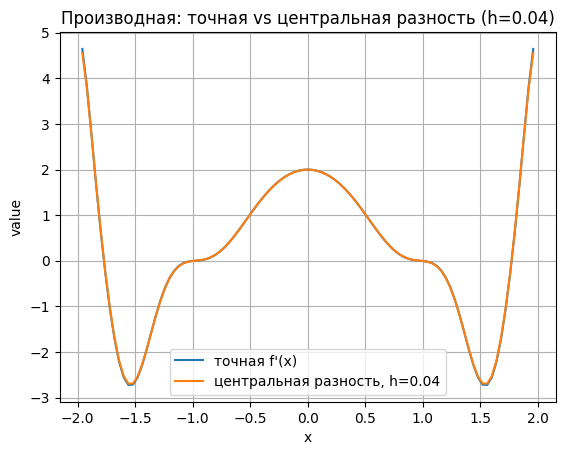

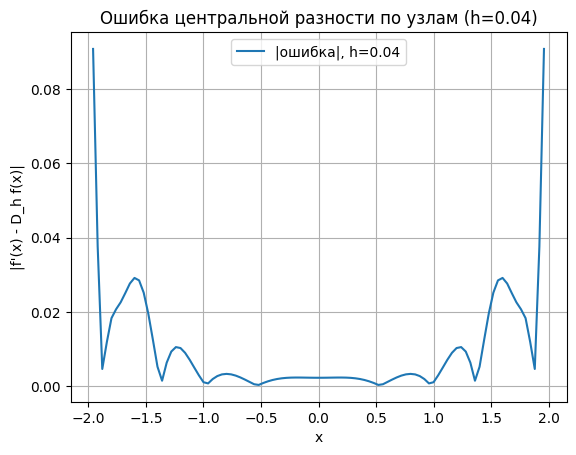

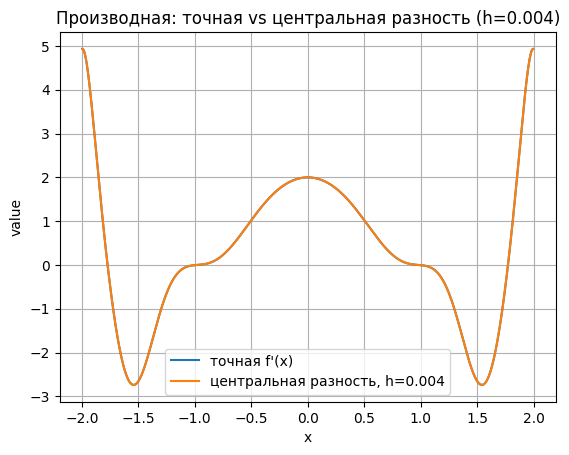

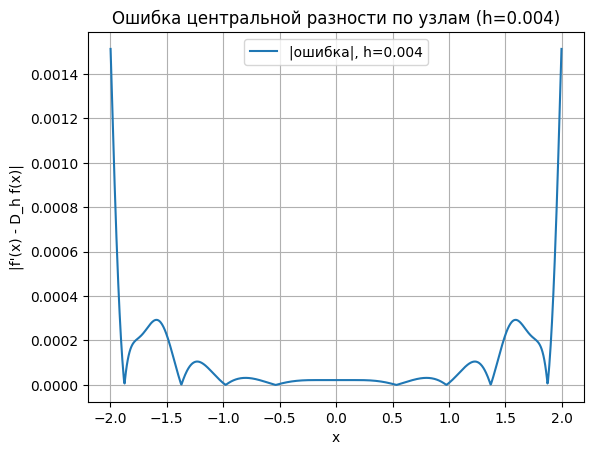

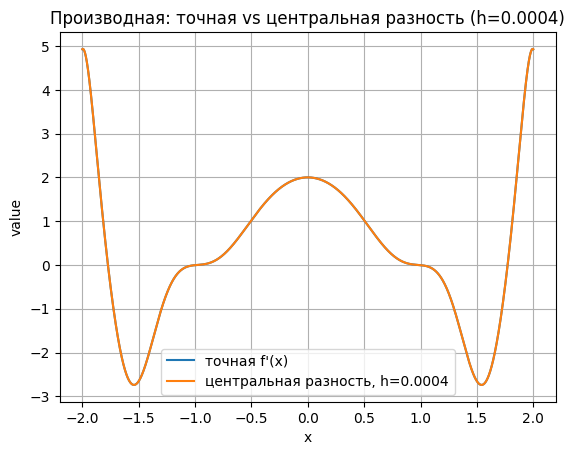

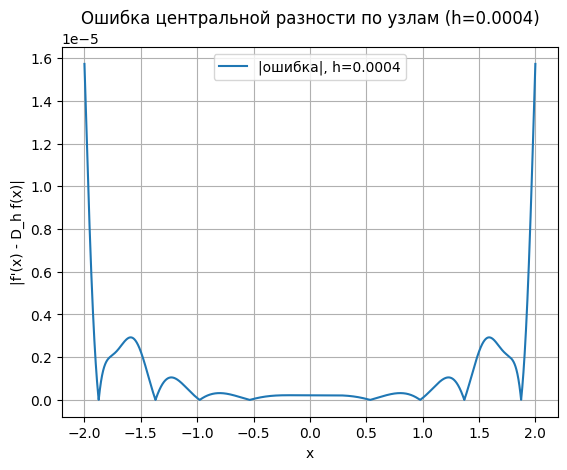

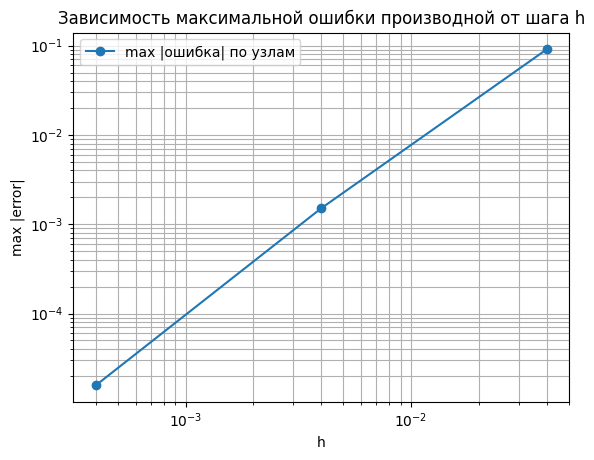

In [9]:
def d_exact(x):
    g = x + x*np.cos(x**2)
    g_prime = 1 + np.cos(x**2) - 2*(x**2)*np.sin(x**2)
    return np.cos(g) * g_prime

def d_central(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

a, b = -2.0, 2.0
L = b - a

fracs = [0.01, 0.001, 0.0001]
hs = [frac * L for frac in fracs]

max_errs = []

for h in hs:
    xx = np.arange(a + h, b - h + 0.5*h, h)

    approx = d_central(f_1, xx, h)
    exact  = d_exact(xx)

    err = np.abs(exact - approx)
    max_err = np.max(err)
    max_errs.append(max_err)

    plt.figure()
    plt.plot(xx, exact,  label="точная f'(x)")
    plt.plot(xx, approx, label=f"центральная разность, h={h:g}")
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("value")
    plt.title(f"Производная: точная vs центральная разность (h={h:g})")
    plt.legend()

    plt.figure()
    plt.plot(xx, err, label=f"|ошибка|, h={h:g}")
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("|f'(x) - D_h f(x)|")
    plt.title(f"Ошибка центральной разности по узлам (h={h:g})")
    plt.legend()

    print(f"h={h:g}: points={len(xx)}  max_err={max_err:.6g}")

max_errs = np.array(max_errs)

plt.figure()
plt.plot(hs, max_errs, marker='o', label="max |ошибка| по узлам")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both")
plt.xlabel("h")
plt.ylabel("max |error|")
plt.title("Зависимость максимальной ошибки производной от шага h")
plt.legend()

"""
C = max_errs[0] / (hs[0]**2)
plt.plot(hs, C*(np.array(hs)**2), '--', label="линия ~ h^2ё")
plt.legend()

plt.show()
"""

**5. Для функции из набора 2 рассчитайте приближенное значение
определенного интеграла функции с использованием составной формулы
трапеций, вычисленное с шагом {0,01;0,001;0,0001} длины отрезка
приближения. Определите ошибку приближенного интегрирования на
заданном отрезке. Проведите эксперимент: сколько ориентировочно раз
понадобится рассчитать функцию в методе Монте-Карло, чтобы оценить
интеграл не хуже, чем по формуле трапеций с шагом 0,01?**

In [13]:
import numpy as np
import math
from scipy.integrate import quad



a, b = -2.0, 2.0
L = b - a

I_ref, _ = quad(f_2, a, b)
print("I_ref (quad) =", I_ref)

def trap(f, a, b, h):
    n = int(round((b-a)/h))
    h = (b-a)/n
    s = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        s += f(a + i*h)
    return s*h, h, n

hs = [0.01*L, 0.001*L, 0.0001*L]

print("\nTrapezoids:")
trap_err_target = None
for h in hs:
    I_h, h_used, n = trap(f_2, a, b, h)
    err = abs(I_h - I_ref)
    print(f"h={h_used:g}  I={I_h:.12g}  |err|={err:.6g}  evals={n+1}")
    if abs(h_used - 0.01*L) < 1e-15:
        trap_err_target = err

print("\nTarget for Monte-Carlo (must be <= this):", trap_err_target)

rng = np.random.default_rng(42)

def mc(f, a, b, N):
    s = 0.0
    for _ in range(N):
        x = rng.uniform(a, b)
        s += f(x)
    return (b-a) * (s / N)

def mc_typical_error(N, trials=50):
    errs = []
    for _ in range(trials):
        I = mc(f_2, a, b, N)
        errs.append(abs(I - I_ref))
    return float(np.median(errs))

print("\nMonte-Carlo experiment (median error over 50 runs):")
N_list = [10_000, 30_000, 100_000, 300_000, 1_000_000]
for N in N_list:
    med_err = mc_typical_error(N, trials=50)
    print(f"N={N:8d}  median|err|={med_err:.6g}  {'OK' if med_err <= trap_err_target else ''}")

/tmp/ipython-input-291/1837853862.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_ref, _ = quad(f_2, a, b)


I_ref (quad) = 1.5548138343210847

Trapezoids:
h=0.04  I=1.55532811726  |err|=0.000514283  evals=101
h=0.004  I=1.55481561045  |err|=1.77613e-06  evals=1001
h=0.0004  I=1.55481375329  |err|=8.10279e-08  evals=10001

Target for Monte-Carlo (must be <= this): 0.0005142829379067848

Monte-Carlo experiment (median error over 50 runs):
N=   10000  median|err|=0.00698553  
N=   30000  median|err|=0.00318751  
N=  100000  median|err|=0.00206986  
N=  300000  median|err|=0.00121215  
N= 1000000  median|err|=0.00062948  
